# Problem

GROCERYGENIUS : SMART GROCERY SHOPPING ASSISTANT WITH BASKET ANALYSIS

# Objectives

* understand the fundamentals of market basket analysis

#### Import required packages

In [1]:
import numpy as np
import pandas as pd

# Loading data

In [2]:
final_df = pd.read_csv("InstacartData.csv")

In [3]:
final_df.describe

<bound method NDFrame.describe of          order_id  product_id  add_to_cart_order  reordered  \
0               1       49302                  1          1   
1               1       11109                  2          1   
2               1       22035                  8          1   
3          816049       49302                  7          1   
4          816049       35176                  5          1   
...           ...         ...                ...        ...   
1384612   2203844       44218                  1          0   
1384613   2221946        3994                  1          0   
1384614   2417998       39511                  2          0   
1384615   2462087       19109                  1          0   
1384616   2969967       24603                  1          0   

                                          product_name  aisle_id  \
0                                     Bulgarian Yogurt       120   
1        Organic 4% Milk Fat Whole Milk Cottage Cheese       108   
2    

In [4]:
final_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'department'],
      dtype='object')

In [5]:
final_df.head(10000)

order_id  product_id  add_to_cart_order  reordered  \
0            1       49302                  1          1   
1            1       11109                  2          1   
2            1       22035                  8          1   
3       816049       49302                  7          1   
4       816049       35176                  5          1   
...        ...         ...                ...        ...   
9995   1783567       48645                 24          1   
9996   1803132       17758                 22          1   
9997   1803132       22151                  9          1   
9998   1803132       37029                 19          1   
9999   1803132        6719                  4          1   

                                       product_name  aisle_id  department_id  \
0                                  Bulgarian Yogurt       120             16   
1     Organic 4% Milk Fat Whole Milk Cottage Cheese       108             16   
2                       Organic Whole String Cheese        21             16   
3                                  Bulgarian Yogurt       120             16   
4                  Cream Cheese Cream Cheese Spread       108             16   
...                                             ...       ...            ...   
9995                        Unsweetened Coconutmilk        91             16   
9996                     Strawberry Rhubarb Yoghurt       120             16   
9997                            Tart Cherry Yoghurt       120             16   
9998                            Cream Cheese Spread       108             16   
9999              Mini Babybel White Cheddar Cheese        21             16   

                     aisle  user_id eval_set  order_number  order_dow  \
0                   yogurt   112108    train             4          4   
1     other creams cheeses   112108    train             4          4   
2          packaged cheese   112108    train             4          4   
3                   yogurt    47901    train            14          4   
4     other creams cheeses    47901    train            14          4   
...                    ...      ...      ...           ...        ...   
9995       soy lactosefree   194488    train             6          3   
9996                yogurt    33830    train             5          5   
9997                yogurt    33830    train             5          5   
9998  other creams cheeses    33830    train             5          5   
9999       packaged cheese    33830    train             5          5   

      order_hour_of_day  days_since_prior_order  department  
0                    10                     9.0  dairy eggs  
1                    10                     9.0  dairy eggs  
2                    10                     9.0  dairy eggs  
3                     6                    16.0  dairy eggs  
4                     6                    16.0  dairy eggs  
...                 ...                     ...         ...  
9995                 17                    24.0  dairy eggs  
9996                 14                    30.0  dairy eggs  
9997                 14                    30.0  dairy eggs  
9998                 14                    30.0  dairy eggs  
9999                 14                    30.0  dairy eggs  

[10000 rows x 15 columns]

In [6]:
final_df.tail(10000)

order_id  product_id  add_to_cart_order  reordered  \
1374617   2093037       19368                  1          1   
1374618   2431740          54                  3          0   
1374619   2788515       23329                  3          1   
1374620    762699       17658                  4          1   
1374621   2597546       20170                  3          0   
...           ...         ...                ...        ...   
1384612   2203844       44218                  1          0   
1384613   2221946        3994                  1          0   
1384614   2417998       39511                  2          0   
1384615   2462087       19109                  1          0   
1384616   2969967       24603                  1          0   

                                       product_name  aisle_id  department_id  \
1374617  With Glade Tough Odor Solutions Cat Litter        41              8   
1374618                 24/7 Performance Cat Litter        41              8   
1374619         Organix Chicken & Brown Rice Recipe        40              8   
1374620                  6\" Free Ranger Bully Stix        40              8   
1374621                                  Beef Jerky        40              8   
...                                             ...       ...            ...   
1384612                                   Duct Tape         6              2   
1384613                 Max Bed Bug and Flea Killer         6              2   
1384614                   Baby Diaper Rash Ointment         6              2   
1384615               Antifungal Clotrimazole Cream         6              2   
1384616             California Blush Pink Champagne         6              2   

                 aisle  user_id eval_set  order_number  order_dow  \
1374617  cat food care   149356    train            18          3   
1374618  cat food care    96182    train            15          0   
1374619  dog food care    80423    train            25          2   
1374620  dog food care    11371    train             6          6   
1374621  dog food care    91946    train            19          6   
...                ...      ...      ...           ...        ...   
1384612          other   109269    train            11          3   
1384613          other    24500    train             9          0   
1384614          other   151951    train            12          0   
1384615          other   168591    train             5          1   
1384616          other   178138    train             8          2   

         order_hour_of_day  days_since_prior_order department  
1374617                 16                    21.0       pets  
1374618                 11                     5.0       pets  
1374619                 20                    30.0       pets  
1374620                 15                    30.0       pets  
1374621                  9                    14.0       pets  
...                    ...                     ...        ...  
1384612                 14                    30.0      other  
1384613                  9                    10.0      other  
1384614                 12                    20.0      other  
1384615                 20                    30.0      other  
1384616                  9                    11.0      other  

[10000 rows x 15 columns]

In [7]:
final_df["order_id"].unique()

array([      1,  816049, 1242203, ..., 1394480, 1460243, 2104247],
      dtype=int64)

In [8]:
final_df["product_id"].unique()
final_df["department_id"].unique()
final_df['add_to_cart_order'].unique()
final_df['reordered'].unique()
final_df['product_name'].unique()
final_df['aisle_id'].unique()
final_df['aisle'].unique()
final_df['user_id'].unique()
final_df['eval_set'].unique()
final_df['order_number'].unique()
final_df['order_dow'].unique()
final_df['order_hour_of_day'].unique()
final_df['days_since_prior_order'].unique()
final_df['department'].unique()

array(['dairy eggs', 'produce', 'canned goods', 'deli', 'snacks',
       'frozen', 'beverages', 'dry goods pasta', 'pantry', 'bakery',
       'meat seafood', 'personal care', 'household', 'babies',
       'breakfast', 'international', 'missing', 'pets', 'alcohol', 'bulk',
       'other'], dtype=object)

In [9]:
print(final_df.shape)

(1384617, 15)


In [10]:
# how does the data looks
print(final_df.shape)# total rows * column count
print("/n")
print(final_df.dtypes)# each column datatype

(1384617, 15)
/n
order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
aisle                      object
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
department                 object
dtype: object


In [11]:
#finding duplicate values in a dataset
final_df.duplicated().sum()

0

In [12]:
#correlation with heatmap to interpret the relation and multicolliniarity
final_df.select_dtypes(include = "number").corr()

order_id  product_id  add_to_cart_order  reordered  \
order_id                1.000000   -0.000545           0.001916   0.001418   
product_id             -0.000545    1.000000           0.003128   0.006560   
add_to_cart_order       0.001916    0.003128           1.000000  -0.146393   
reordered               0.001418    0.006560          -0.146393   1.000000   
aisle_id               -0.000814   -0.001932           0.010887  -0.000172   
department_id           0.002708   -0.027212           0.027428  -0.050294   
user_id                -0.000867   -0.001014           0.000739  -0.004316   
order_number            0.001522   -0.001463           0.014332   0.223947   
order_dow               0.001090   -0.003597          -0.019353  -0.006714   
order_hour_of_day      -0.004422    0.001829          -0.008905  -0.017840   
days_since_prior_order  0.002708    0.001036           0.017283  -0.160152   

                        aisle_id  department_id   user_id  order_number  \
order_id               -0.000814       0.002708 -0.000867      0.001522   
product_id             -0.001932      -0.027212 -0.001014     -0.001463   
add_to_cart_order       0.010887       0.027428  0.000739      0.014332   
reordered              -0.000172      -0.050294 -0.004316      0.223947   
aisle_id                1.000000       0.061357  0.000972     -0.002022   
department_id           0.061357       1.000000 -0.000548     -0.001568   
user_id                 0.000972      -0.000548  1.000000     -0.003715   
order_number           -0.002022      -0.001568 -0.003715      1.000000   
order_dow              -0.002933       0.006798 -0.006746      0.024500   
order_hour_of_day      -0.001078      -0.005992 -0.001239     -0.026567   
days_since_prior_order  0.006088       0.005045  0.003854     -0.403861   

                        order_dow  order_hour_of_day  days_since_prior_order  
order_id                 0.001090          -0.004422                0.002708  
product_id              -0.003597           0.001829                0.001036  
add_to_cart_order       -0.019353          -0.008905                0.017283  
reordered               -0.006714          -0.017840               -0.160152  
aisle_id                -0.002933          -0.001078                0.006088  
department_id            0.006798          -0.005992                0.005045  
user_id                 -0.006746          -0.001239                0.003854  
order_number             0.024500          -0.026567               -0.403861  
order_dow                1.000000           0.005910               -0.026765  
order_hour_of_day        0.005910           1.000000                0.005184  
days_since_prior_order  -0.026765           0.005184                1.000000

In [13]:
#choose the method of imputing missing value
#like mean,median,mode or KNNIputer
final_df.isnull().sum()#there is no null values in this datase

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
department                0
dtype: int64

# Data Preprocessing

# Step 1: Handle Missing Values

In [14]:
# Check for missing values
missing_values = final_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values, for example, by imputing with mean or mode for numerical columns
final_df['days_since_prior_order'].fillna(final_df['days_since_prior_order'].mean(), inplace=True)

Missing Values:
 order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
department                0
dtype: int64


# Step 2: Encode Categorical Variables

In [15]:
# One-hot encode categorical variables
import pandas as pd
final_df_encoded = pd.get_dummies(final_df, columns=['department'])

# Step 3: Scale Numerical Features

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
numerical_columns = ['add_to_cart_order', 'days_since_prior_order']
final_df_encoded[numerical_columns] = scaler.fit_transform(final_df_encoded[numerical_columns])

# EXPLORATORY DATA ANALYSIS

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Understanding the dataset

In [18]:
final_df.head(100)

order_id  product_id  add_to_cart_order  reordered  \
0          1       49302                  1          1   
1          1       11109                  2          1   
2          1       22035                  8          1   
3     816049       49302                  7          1   
4     816049       35176                  5          1   
..       ...         ...                ...        ...   
95    321733       10761                 13          0   
96    321733       22035                 10          1   
97    321733       22959                  1          1   
98    362722       43654                 34          0   
99    362722       12745                 35          1   

                                         product_name  aisle_id  \
0                                    Bulgarian Yogurt       120   
1       Organic 4% Milk Fat Whole Milk Cottage Cheese       108   
2                         Organic Whole String Cheese        21   
3                                    Bulgarian Yogurt       120   
4                    Cream Cheese Cream Cheese Spread       108   
..                                                ...       ...   
95  Organic Yokids Lemonade/Blueberry Variety Pack...       120   
96                        Organic Whole String Cheese        21   
97                 Reduced Fat Milk 100% Lactose Free        91   
98       Whole Milk Greek Blended Vanilla Bean Yogurt       120   
99                         Yogurt, Lowfat, Strawberry       120   

    department_id                 aisle  user_id eval_set  order_number  \
0              16                yogurt   112108    train             4   
1              16  other creams cheeses   112108    train             4   
2              16       packaged cheese   112108    train             4   
3              16                yogurt    47901    train            14   
4              16  other creams cheeses    47901    train            14   
..            ...                   ...      ...      ...           ...   
95             16                yogurt   187907    train             6   
96             16       packaged cheese   187907    train             6   
97             16       soy lactosefree   187907    train             6   
98             16                yogurt   203714    train             6   
99             16                yogurt   203714    train             6   

    order_dow  order_hour_of_day  days_since_prior_order  department  
0           4                 10                     9.0  dairy eggs  
1           4                 10                     9.0  dairy eggs  
2           4                 10                     9.0  dairy eggs  
3           4                  6                    16.0  dairy eggs  
4           4                  6                    16.0  dairy eggs  
..        ...                ...                     ...         ...  
95          6                 16                    30.0  dairy eggs  
96          6                 16                    30.0  dairy eggs  
97          6                 16                    30.0  dairy eggs  
98          3                  8                    30.0  dairy eggs  
99          3                  8                    30.0  dairy eggs  

[100 rows x 15 columns]

In [19]:
print("Dimensions:", final_df.shape)

Dimensions: (1384617, 15)


In [20]:
print("Data Types:\n", final_df.dtypes)

Data Types:
 order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
aisle                      object
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
department                 object
dtype: object


In [21]:
("Missing Values:\n", final_df.isnull().sum())

('Missing Values:\n',
 order_id                  0
 product_id                0
 add_to_cart_order         0
 reordered                 0
 product_name              0
 aisle_id                  0
 department_id             0
 aisle                     0
 user_id                   0
 eval_set                  0
 order_number              0
 order_dow                 0
 order_hour_of_day         0
 days_since_prior_order    0
 department                0
 dtype: int64)

In [22]:
("Summary Statistics for Numerical Columns:\n", final_df.describe())

('Summary Statistics for Numerical Columns:\n',
            order_id    product_id  add_to_cart_order     reordered  \
 count  1.384617e+06  1.384617e+06       1.384617e+06  1.384617e+06   
 mean   1.706298e+06  2.555624e+04       8.758044e+00  5.985944e-01   
 std    9.897326e+05  1.412127e+04       7.423936e+00  4.901829e-01   
 min    1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00   
 25%    8.433700e+05  1.338000e+04       3.000000e+00  0.000000e+00   
 50%    1.701880e+06  2.529800e+04       7.000000e+00  1.000000e+00   
 75%    2.568023e+06  3.794000e+04       1.200000e+01  1.000000e+00   
 max    3.421070e+06  4.968800e+04       8.000000e+01  1.000000e+00   
 
            aisle_id  department_id       user_id  order_number     order_dow  \
 count  1.384617e+06   1.384617e+06  1.384617e+06  1.384617e+06  1.384617e+06   
 mean   7.130423e+01   9.839777e+00  1.031128e+05  1.709141e+01  2.701392e+00   
 std    3.810409e+01   6.292830e+00  5.948715e+04  1.661404e+01  2.1

In [23]:
("Summary Statistics for Categorical Columns:\n", final_df.describe(include='object'))

('Summary Statistics for Categorical Columns:\n',
        product_name             aisle eval_set department
 count       1384617           1384617  1384617    1384617
 unique        39123               134        1         21
 top          Banana  fresh vegetables    train    produce
 freq          18726            150609  1384617     409087)

In [24]:
final_df.describe()

order_id    product_id  add_to_cart_order     reordered  \
count  1.384617e+06  1.384617e+06       1.384617e+06  1.384617e+06   
mean   1.706298e+06  2.555624e+04       8.758044e+00  5.985944e-01   
std    9.897326e+05  1.412127e+04       7.423936e+00  4.901829e-01   
min    1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00   
25%    8.433700e+05  1.338000e+04       3.000000e+00  0.000000e+00   
50%    1.701880e+06  2.529800e+04       7.000000e+00  1.000000e+00   
75%    2.568023e+06  3.794000e+04       1.200000e+01  1.000000e+00   
max    3.421070e+06  4.968800e+04       8.000000e+01  1.000000e+00   

           aisle_id  department_id       user_id  order_number     order_dow  \
count  1.384617e+06   1.384617e+06  1.384617e+06  1.384617e+06  1.384617e+06   
mean   7.130423e+01   9.839777e+00  1.031128e+05  1.709141e+01  2.701392e+00   
std    3.810409e+01   6.292830e+00  5.948715e+04  1.661404e+01  2.167646e+00   
min    1.000000e+00   1.000000e+00  1.000000e+00  4.000000e+00  0.000000e+00   
25%    3.100000e+01   4.000000e+00  5.173200e+04  6.000000e+00  1.000000e+00   
50%    8.300000e+01   8.000000e+00  1.029330e+05  1.100000e+01  3.000000e+00   
75%    1.070000e+02   1.600000e+01  1.549590e+05  2.100000e+01  5.000000e+00   
max    1.340000e+02   2.100000e+01  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       1.384617e+06            1.384617e+06  
mean        1.357759e+01            1.706613e+01  
std         4.238458e+00            1.042642e+01  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            7.000000e+00  
50%         1.400000e+01            1.500000e+01  
75%         1.700000e+01            3.000000e+01  
max         2.300000e+01            3.000000e+01

#  Data Visualization

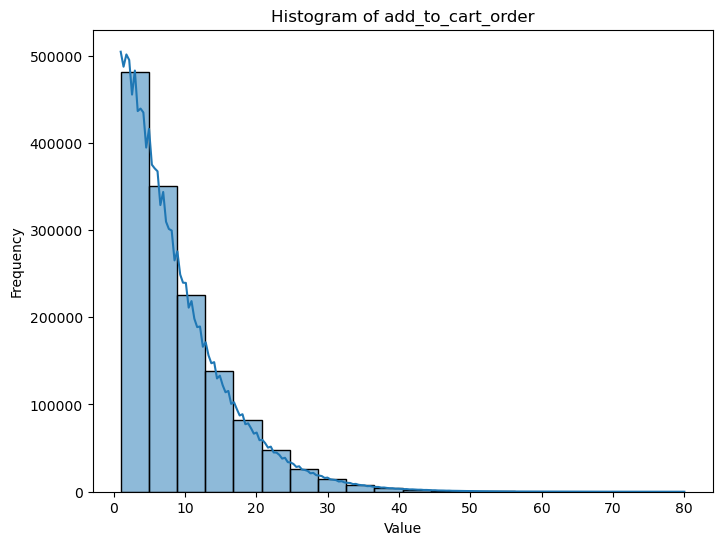

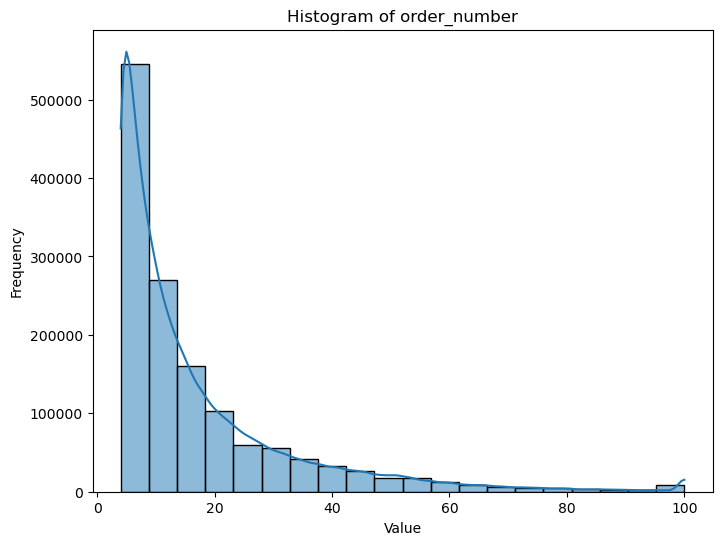

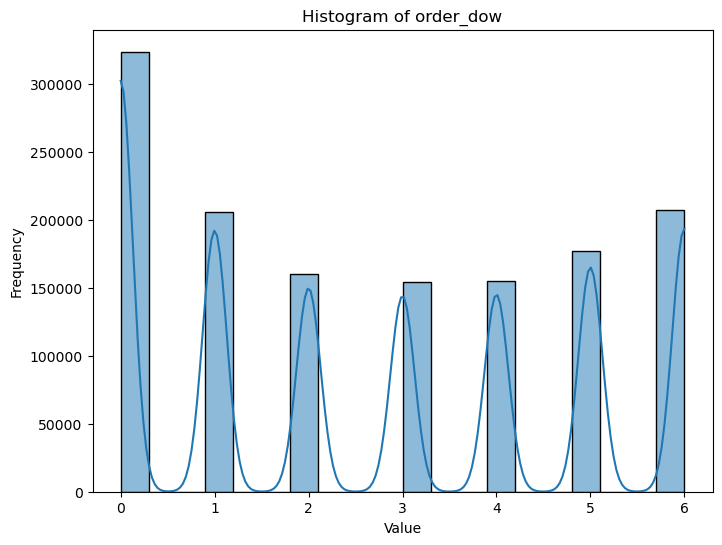

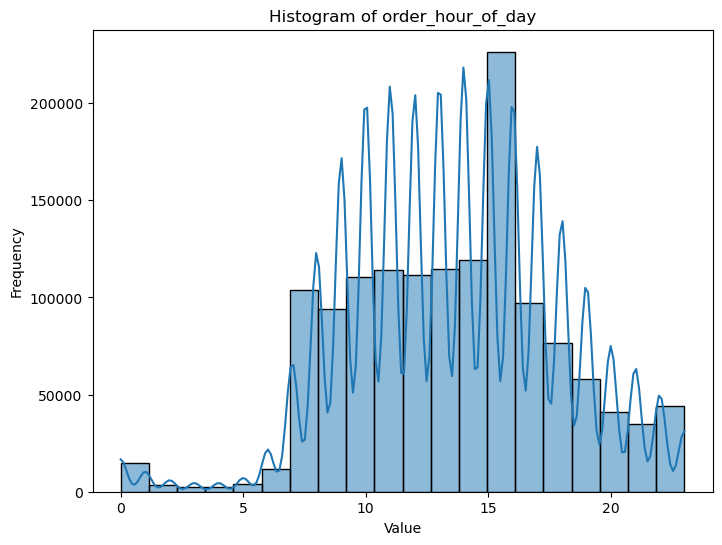

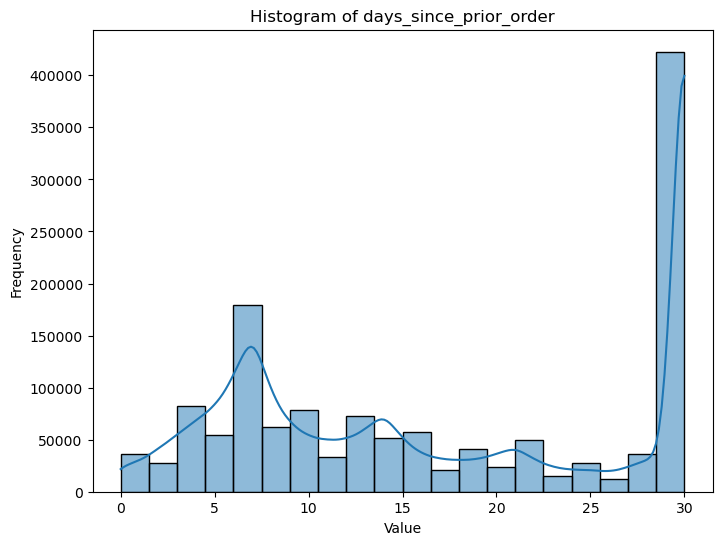

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_df' is  DataFrame containing the dataset

# List of numerical columns
numerical_columns = ['add_to_cart_order', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(final_df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

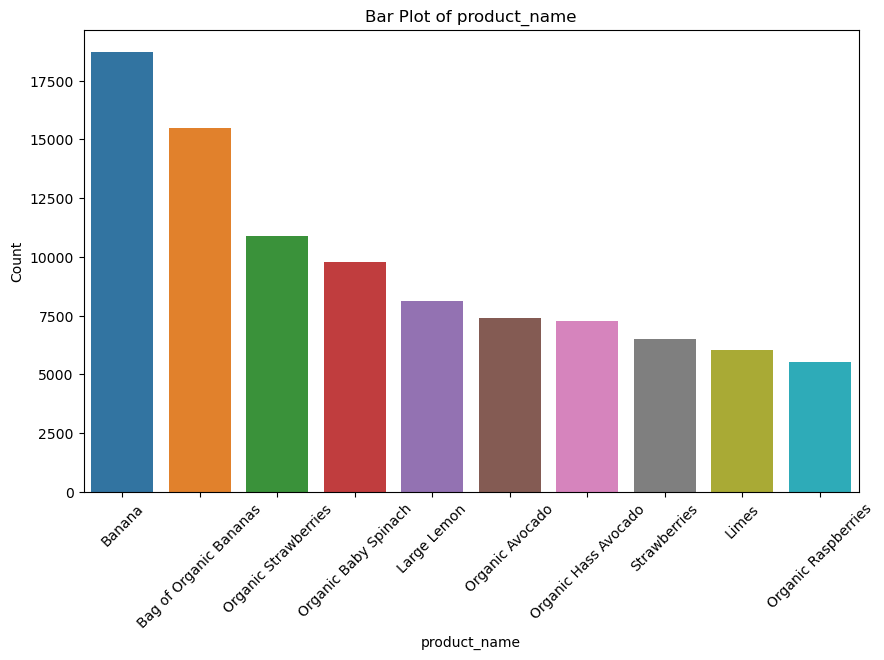

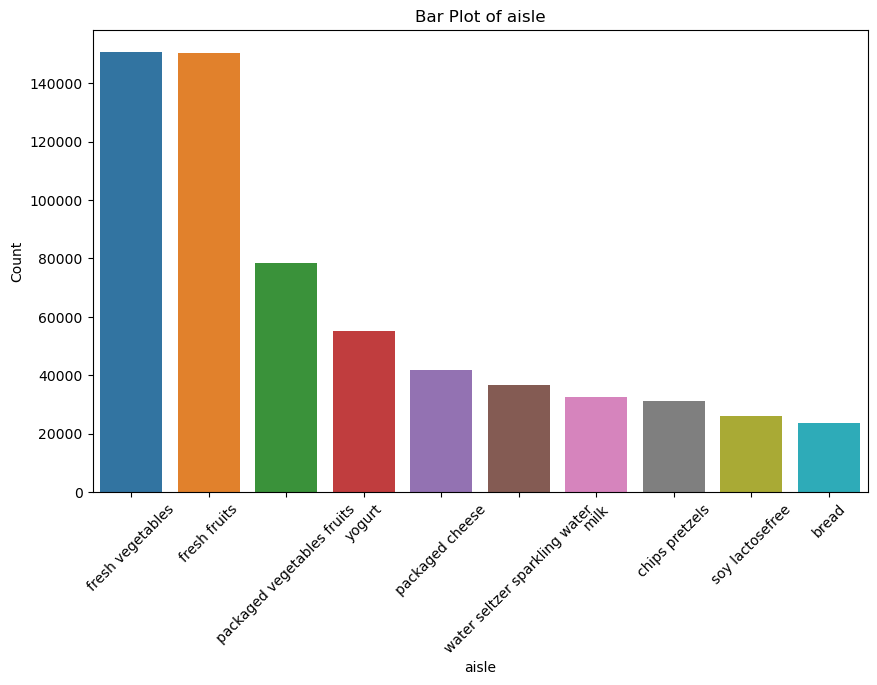

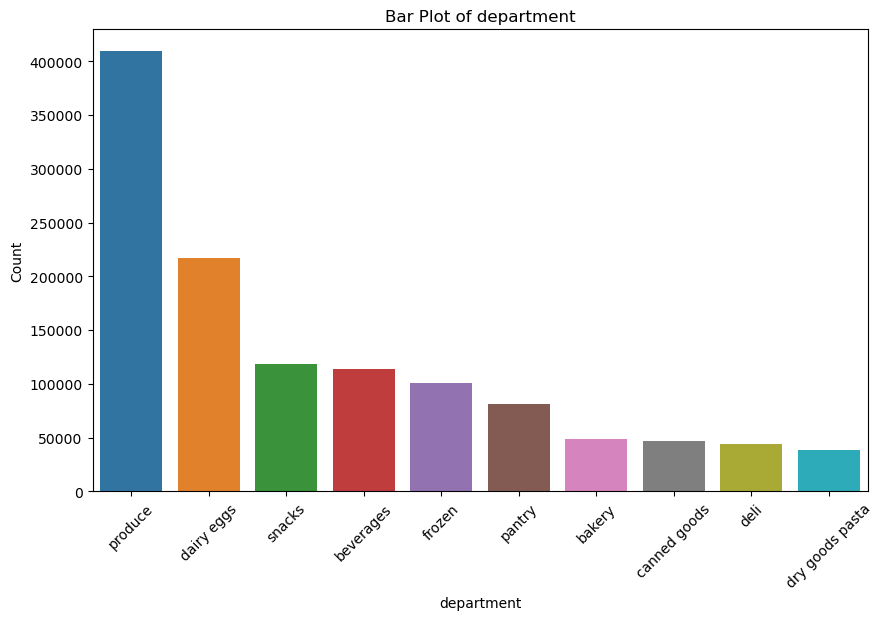

In [26]:
# Bar plot for categorical variables
import seaborn as sns
import matplotlib.pyplot as plt
categorical_columns = ['product_name', 'aisle', 'department']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=final_df, order=final_df[column].value_counts().index[:10])
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

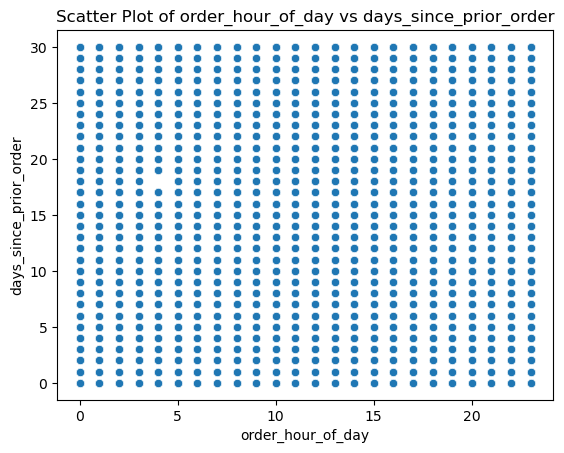

In [27]:
# Scatter plot to explore relationships
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='order_hour_of_day', y='days_since_prior_order', data=final_df)
plt.title('Scatter Plot of order_hour_of_day vs days_since_prior_order')
plt.xlabel('order_hour_of_day')
plt.ylabel('days_since_prior_order')
plt.show()

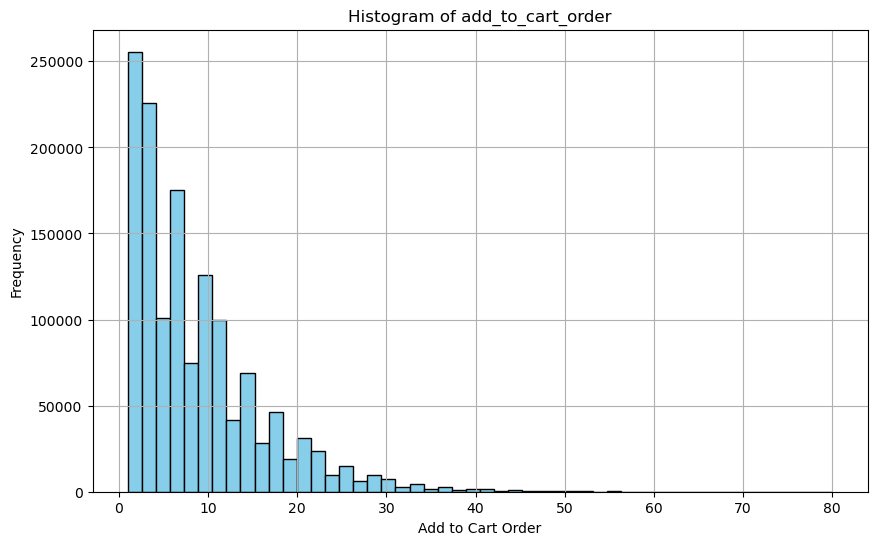

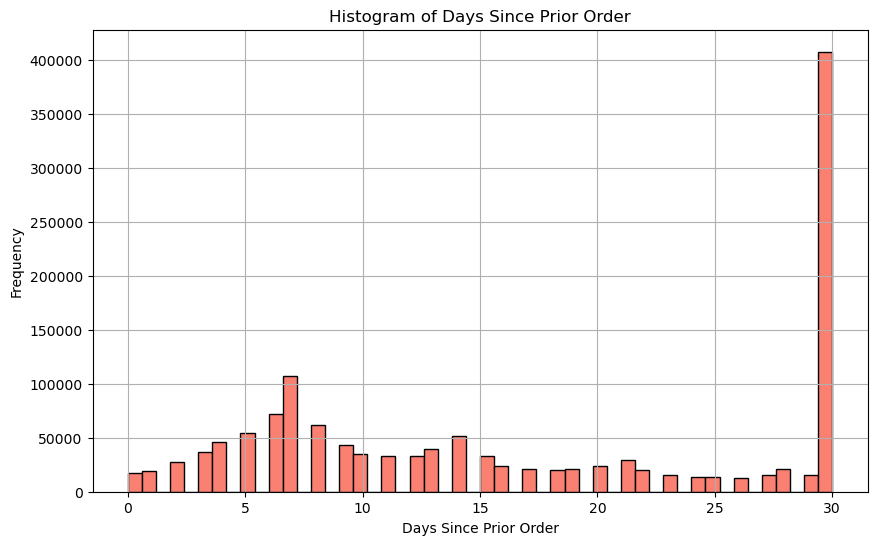

In [28]:
import matplotlib.pyplot as plt

# Histogram for add_to_cart_order
plt.figure(figsize=(10, 6))
plt.hist(final_df['add_to_cart_order'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of add_to_cart_order')
plt.xlabel('Add to Cart Order')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for days_since_prior_order
plt.figure(figsize=(10, 6))
plt.hist(final_df['days_since_prior_order'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

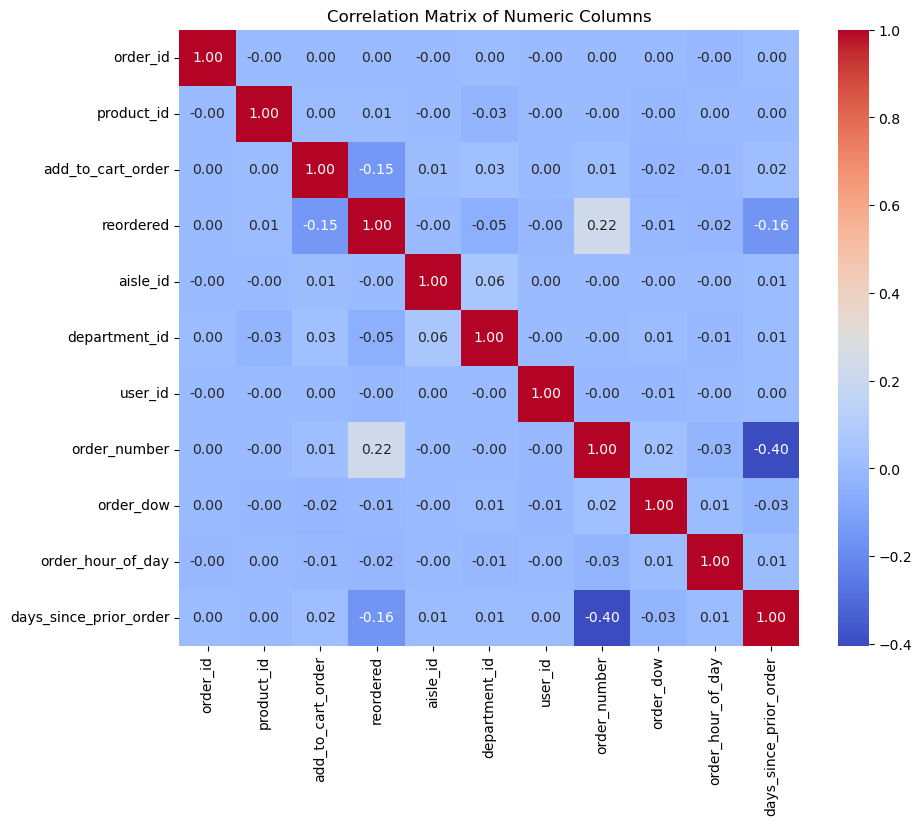

In [29]:
import seaborn as sns

# Select numeric columns
numeric_columns = final_df.select_dtypes(include="number")

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

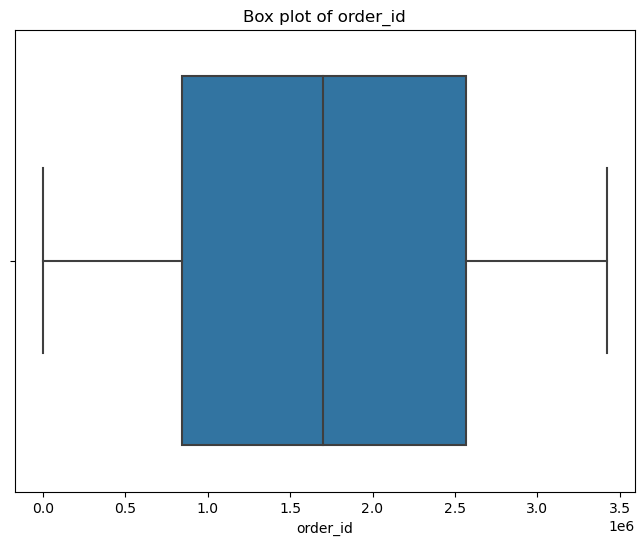

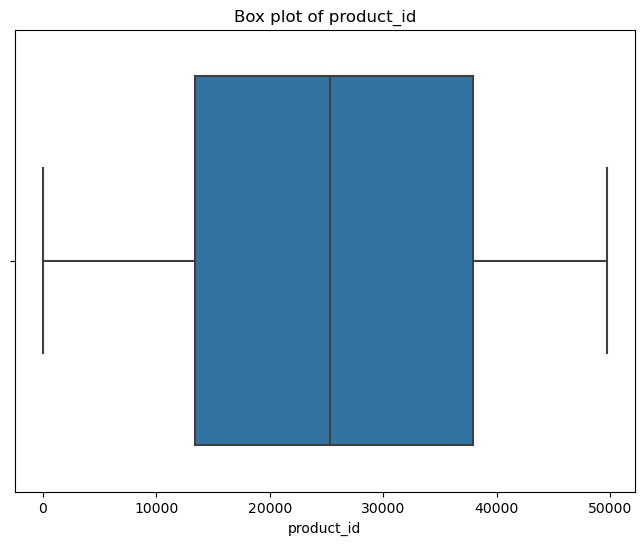

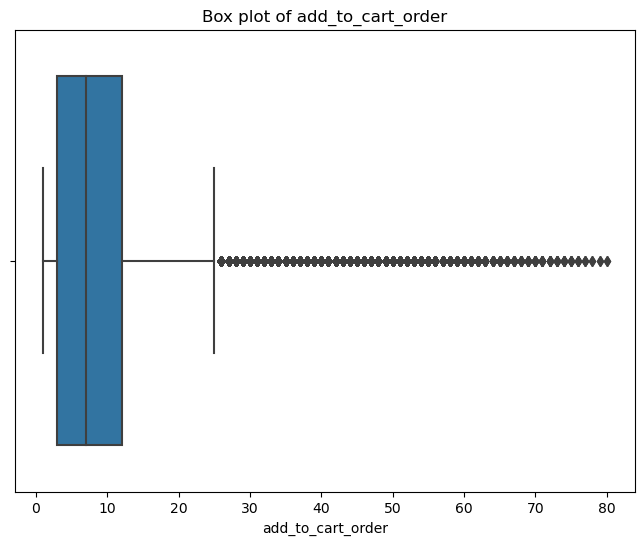

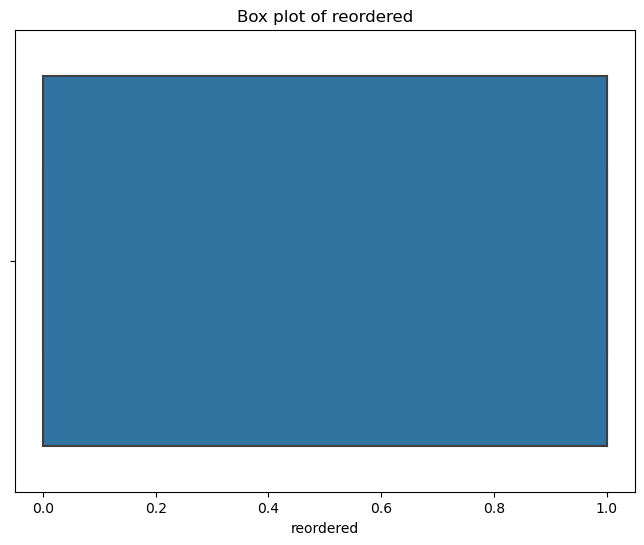

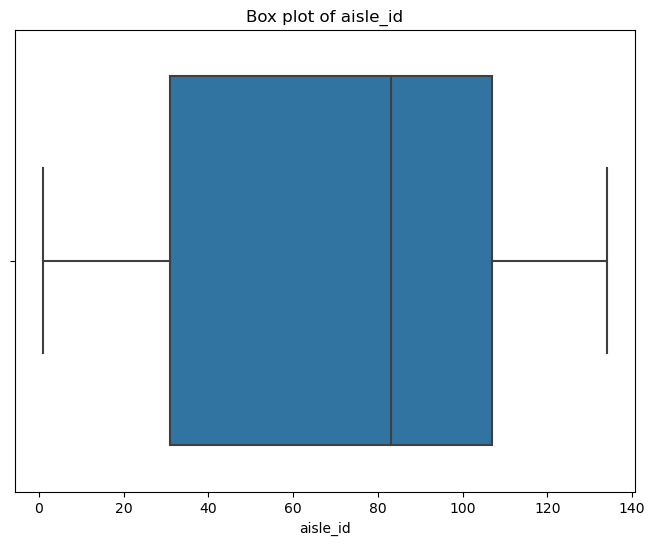

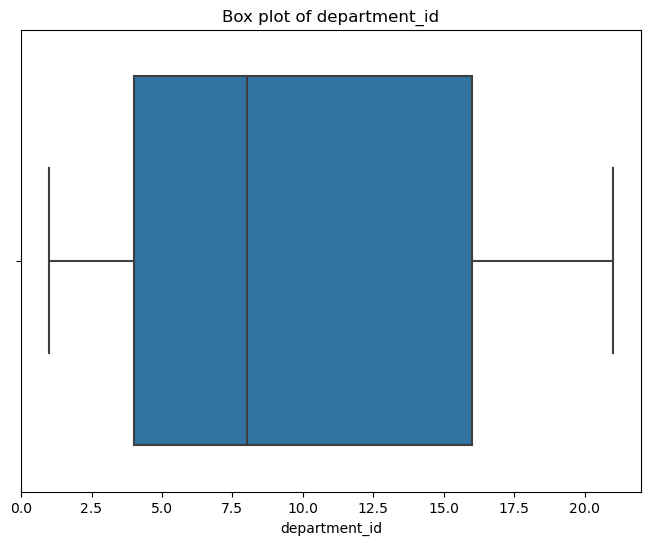

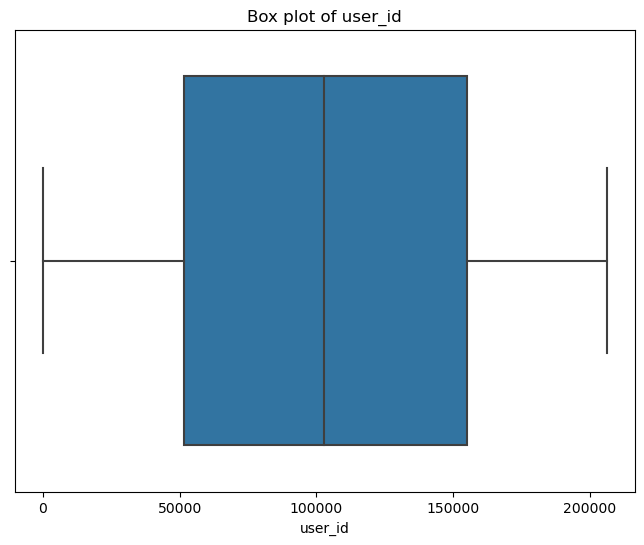

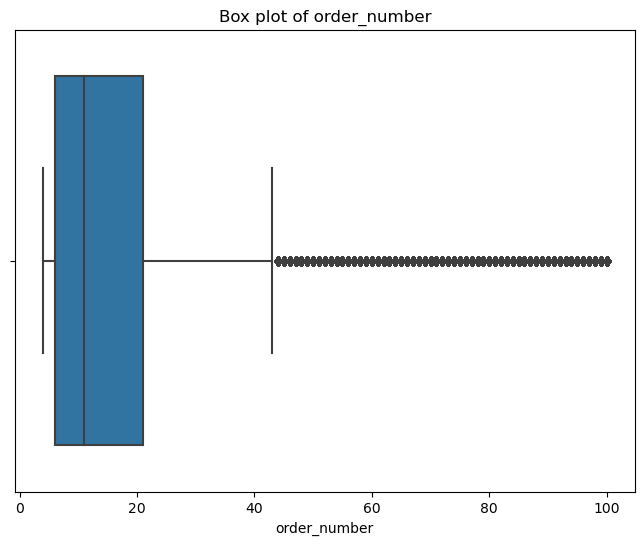

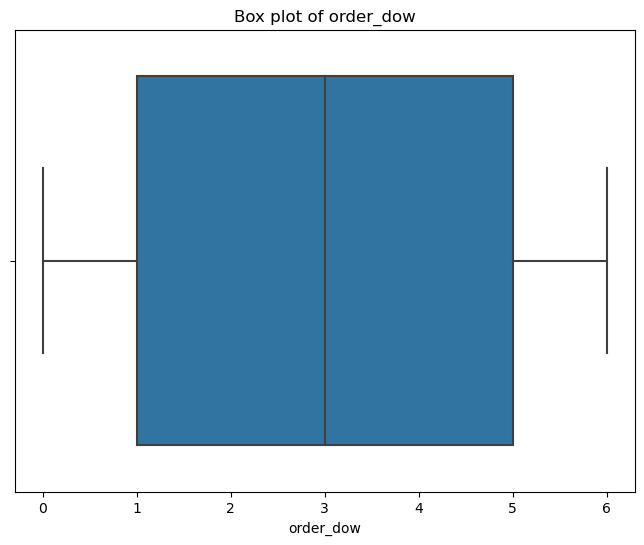

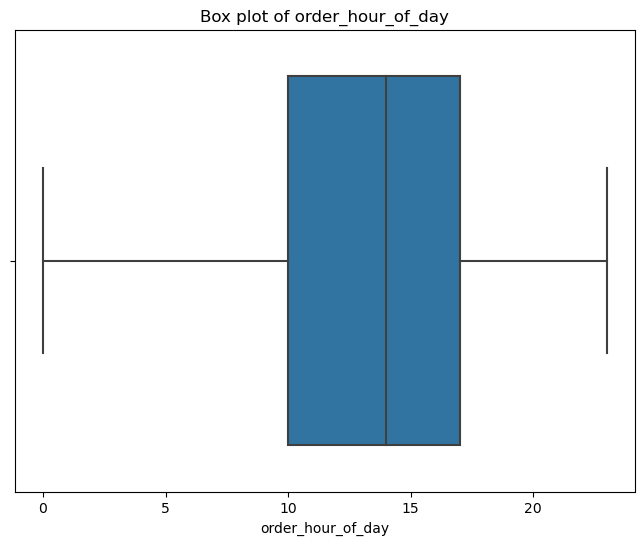

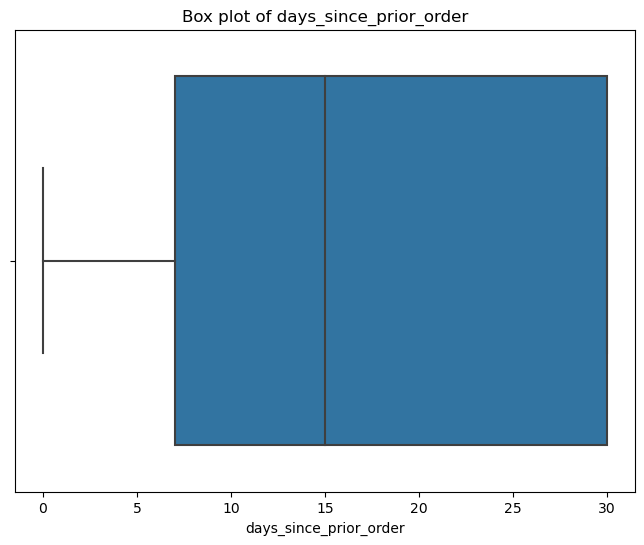

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in final_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=final_df, x=column)
    plt.title(f'Box plot of order_id' if column == 'order_id' else f'Box plot of {column}')
    plt.xlabel('order_id' if column == 'order_id' else column)
    plt.show()

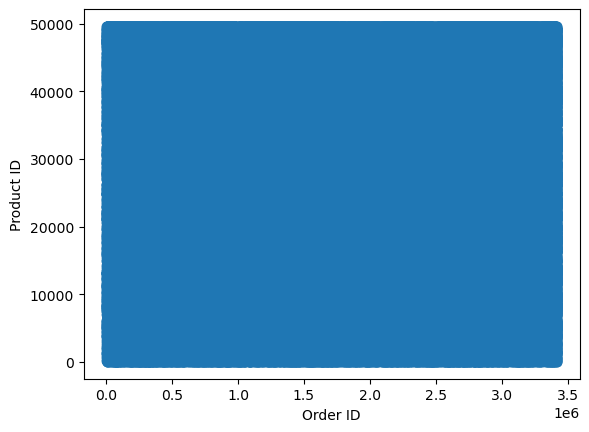

In [31]:
import matplotlib.pyplot as plt

# Assumingis a final_df DataFrame containing data to plot
plt.scatter(final_df['order_id'], final_df['product_id'], alpha=0.5)
plt.xlabel('Order ID')
plt.ylabel('Product ID')
plt.show()

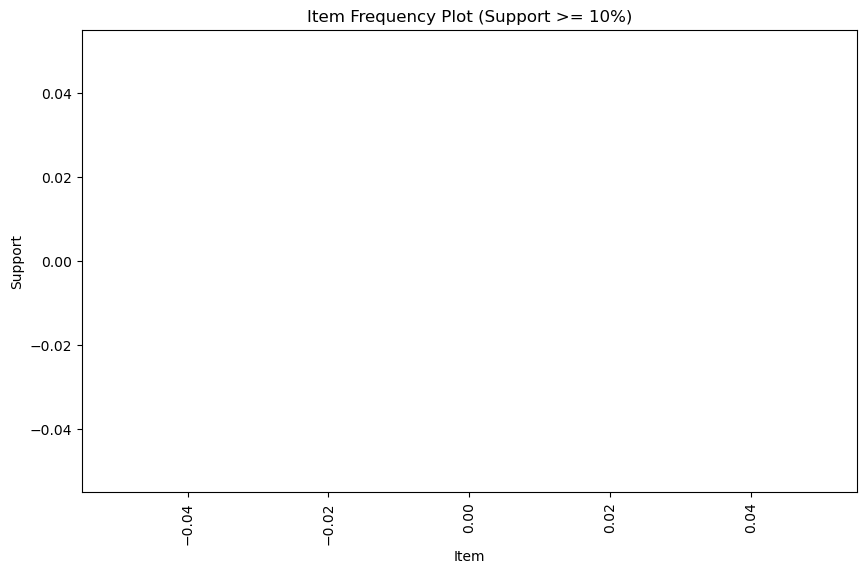

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating item frequency
item_counts = final_df['product_name'].value_counts(normalize=True)

# Filtering items with a support of 10% or higher
frequent_items = item_counts[item_counts >= 0.10].reset_index()

# Renaming columns properly
frequent_items.columns = ['Item', 'Support']

# Plotting the item frequency
plt.figure(figsize=(10, 6))
plt.bar(frequent_items['Item'], frequent_items['Support'])  # Use 'Item' column
plt.xlabel('Item')
plt.ylabel('Support')
plt.title('Item Frequency Plot (Support >= 10%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

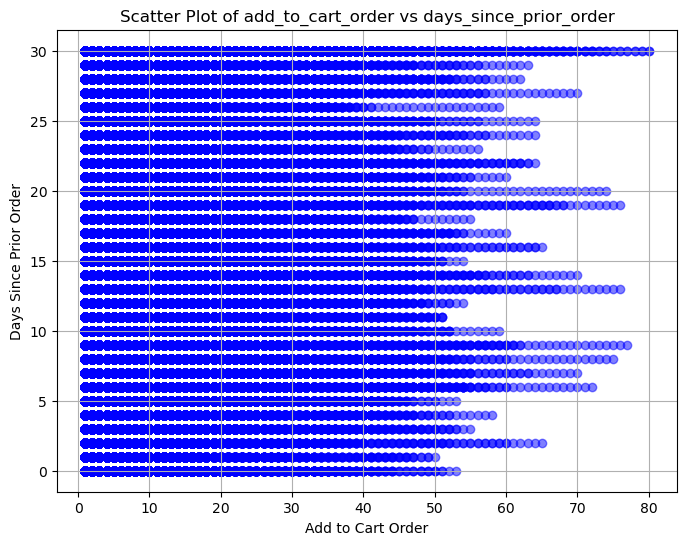

In [33]:
import matplotlib.pyplot as plt

# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(final_df['add_to_cart_order'], final_df['days_since_prior_order'], color='blue', alpha=0.5)
plt.title('Scatter Plot of add_to_cart_order vs days_since_prior_order')
plt.xlabel('Add to Cart Order')
plt.ylabel('Days Since Prior Order')
plt.grid(True)
plt.show()

In [34]:
# describe function used to find the total count,mean,standard deviation,maximum value,minimum value
# 25,50,75 percentage of the dataset value
final_df.describe()

order_id    product_id  add_to_cart_order     reordered  \
count  1.384617e+06  1.384617e+06       1.384617e+06  1.384617e+06   
mean   1.706298e+06  2.555624e+04       8.758044e+00  5.985944e-01   
std    9.897326e+05  1.412127e+04       7.423936e+00  4.901829e-01   
min    1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00   
25%    8.433700e+05  1.338000e+04       3.000000e+00  0.000000e+00   
50%    1.701880e+06  2.529800e+04       7.000000e+00  1.000000e+00   
75%    2.568023e+06  3.794000e+04       1.200000e+01  1.000000e+00   
max    3.421070e+06  4.968800e+04       8.000000e+01  1.000000e+00   

           aisle_id  department_id       user_id  order_number     order_dow  \
count  1.384617e+06   1.384617e+06  1.384617e+06  1.384617e+06  1.384617e+06   
mean   7.130423e+01   9.839777e+00  1.031128e+05  1.709141e+01  2.701392e+00   
std    3.810409e+01   6.292830e+00  5.948715e+04  1.661404e+01  2.167646e+00   
min    1.000000e+00   1.000000e+00  1.000000e+00  4.000000e+00  0.000000e+00   
25%    3.100000e+01   4.000000e+00  5.173200e+04  6.000000e+00  1.000000e+00   
50%    8.300000e+01   8.000000e+00  1.029330e+05  1.100000e+01  3.000000e+00   
75%    1.070000e+02   1.600000e+01  1.549590e+05  2.100000e+01  5.000000e+00   
max    1.340000e+02   2.100000e+01  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       1.384617e+06            1.384617e+06  
mean        1.357759e+01            1.706613e+01  
std         4.238458e+00            1.042642e+01  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            7.000000e+00  
50%         1.400000e+01            1.500000e+01  
75%         1.700000e+01            3.000000e+01  
max         2.300000e+01            3.000000e+01

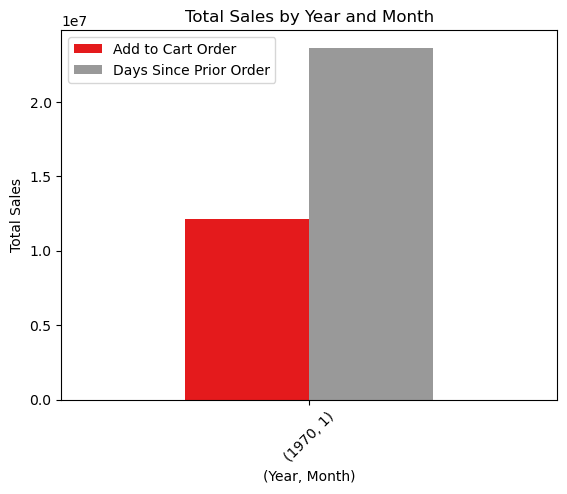

In [35]:
# Assuming 'final_df' is your dataset DataFrame
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'order_date' column to datetime format if it's not already in datetime format
final_df['order_hour_of_day'] = pd.to_datetime(final_df['order_hour_of_day'])


# Extracting 'Year' and 'Month' from the 'order_date' column
final_df['Year'] = final_df['order_hour_of_day'].dt.year
final_df['Month'] = final_df['order_hour_of_day'].dt.month

# Grouping by 'Year' and 'Month' and calculating the sum of 'add_to_cart_order' and 'days_since_prior_order'
sales = final_df.groupby(['Year', 'Month']).agg({'add_to_cart_order':'sum', 'days_since_prior_order':'sum'})

# Plotting the data
sales.plot(kind='bar', y=['add_to_cart_order', 'days_since_prior_order'], cmap='Set1')
plt.title('Total Sales by Year and Month')
plt.xlabel('(Year, Month)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(["Add to Cart Order", "Days Since Prior Order"])
plt.show()

In [36]:
final_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'department', 'Year', 'Month'],
      dtype='object')

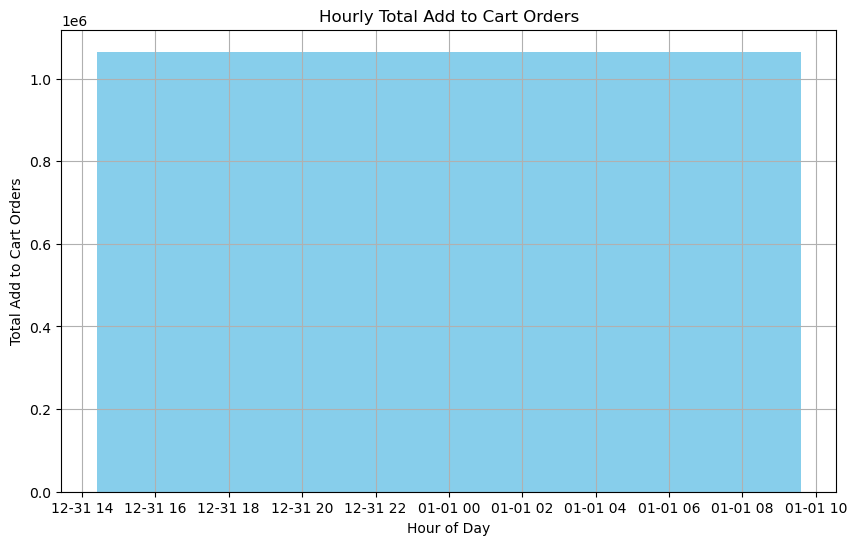

In [37]:
# Grouping by 'order_hour_of_day' and calculating the sum of 'add_to_cart_order'
sales_hourly = final_df.groupby('order_hour_of_day')['add_to_cart_order'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sales_hourly['order_hour_of_day'], sales_hourly['add_to_cart_order'], color='skyblue')
plt.title('Hourly Total Add to Cart Orders')
plt.xlabel('Hour of Day')
plt.ylabel('Total Add to Cart Orders')
plt.grid(True)
plt.show()

In [38]:
# Grouping by 'department' and summing 'add_to_cart_order'
department_sales = final_df.groupby('department')['add_to_cart_order'].sum().reset_index()

# Plotting the data
import plotly.express as px
fig = px.bar(department_sales, x='department', y='add_to_cart_order', title='Total Sales by Department')
fig.update_layout(xaxis={'categoryorder': 'total descending'}, yaxis_title='Total Add to Cart Orders')
plt.savefig("bar_dep.png")
fig.show()

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming 'final_df' is your DataFrame
top_items = final_df[['product_name', 'add_to_cart_order']].sort_values(by='add_to_cart_order', ascending=False)[:10]
top_items_styled = top_items.style.background_gradient(cmap='viridis', subset=['add_to_cart_order']).format("{:.0f}", subset=['add_to_cart_order'])

# Display the styled DataFrame
top_items_styled

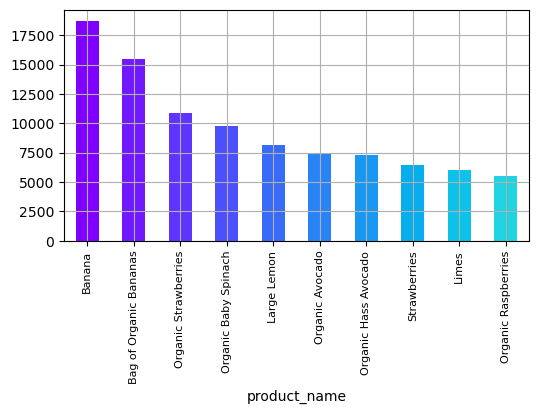

In [40]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Assuming 'final_df' is your DataFrame
color = plt.cm.rainbow(np.linspace(0, 1, 30))
final_df['product_name'].value_counts().head(10).plot.bar(color=color, figsize=(6, 3))

plt.xticks(rotation=90, fontsize=8)
plt.grid()
plt.show()

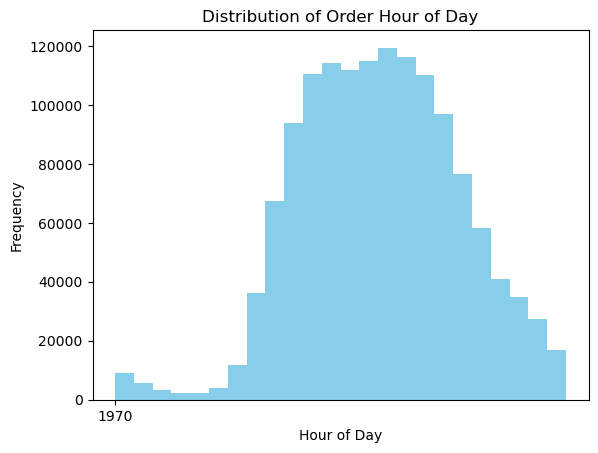

In [41]:
plt.hist(final_df['order_hour_of_day'], bins=24, color='skyblue')
plt.title('Distribution of Order Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

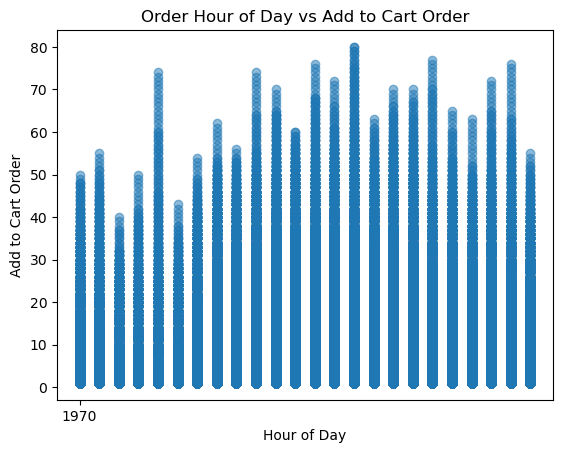

In [42]:
plt.scatter(final_df['order_hour_of_day'], final_df['add_to_cart_order'], alpha=0.5)
plt.title('Order Hour of Day vs Add to Cart Order')
plt.xlabel('Hour of Day')
plt.ylabel('Add to Cart Order')
plt.show()

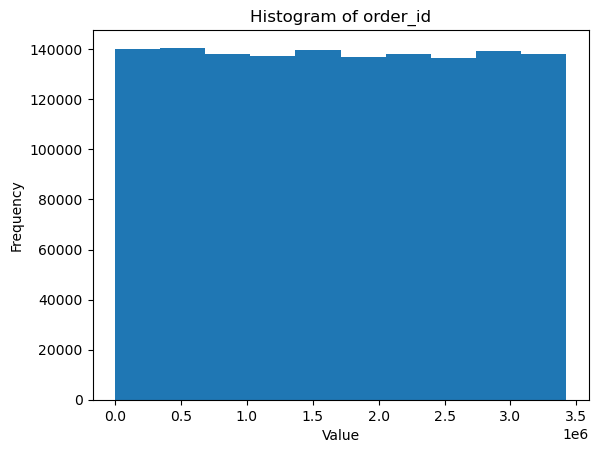

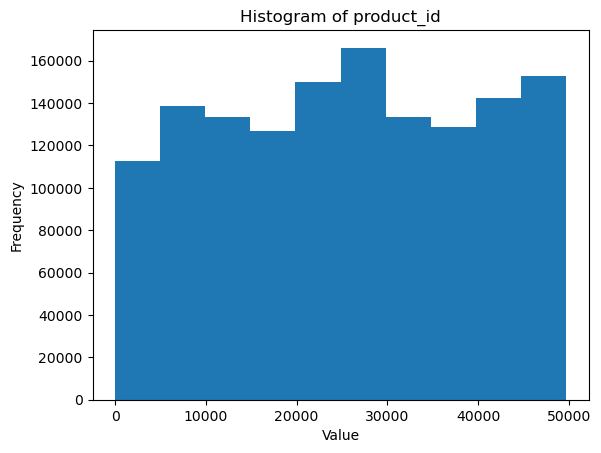

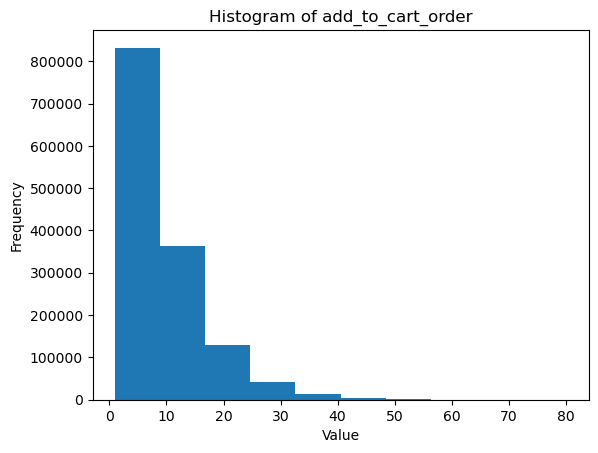

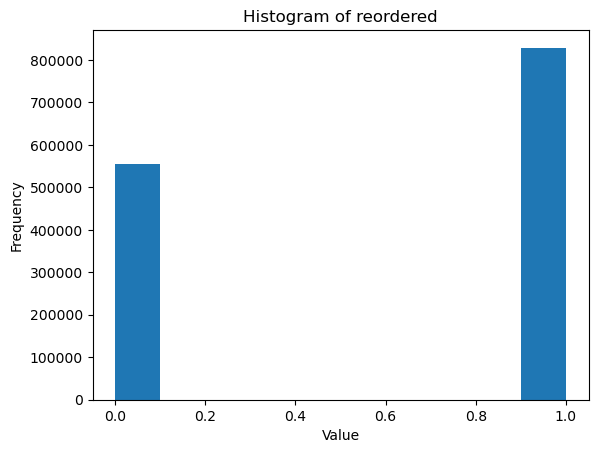

C:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 143 (\x8f) missing from current font.



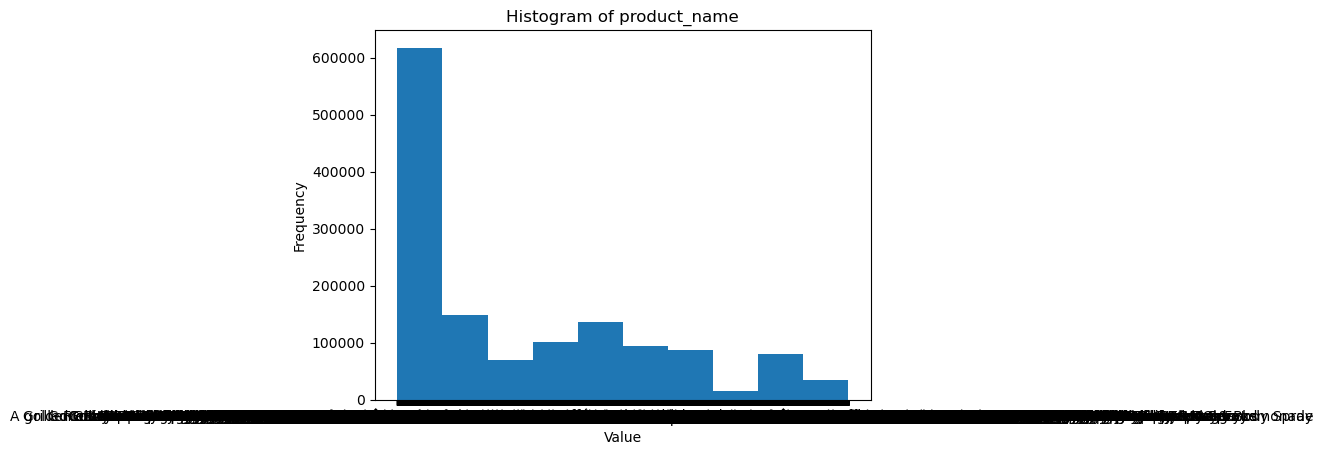

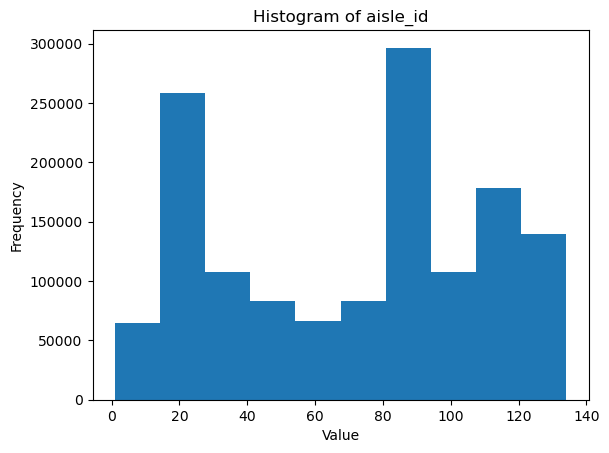

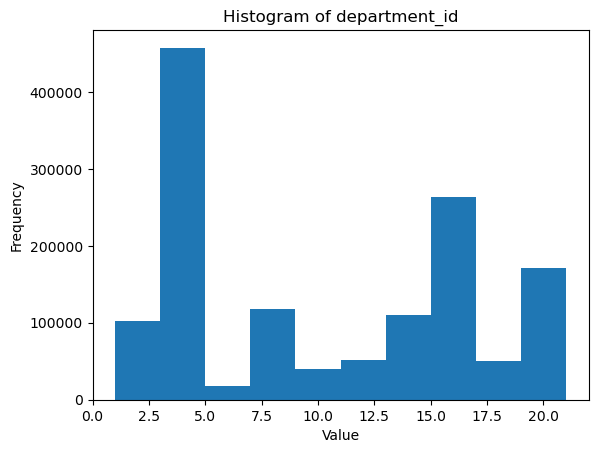

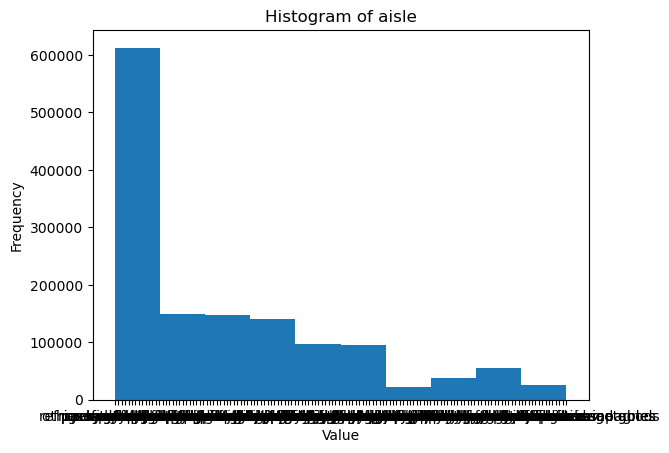

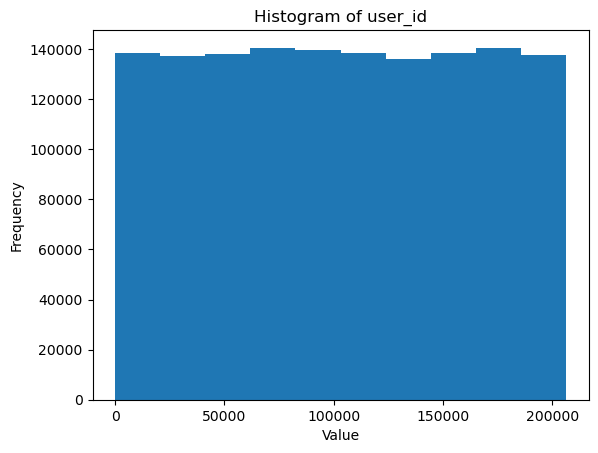

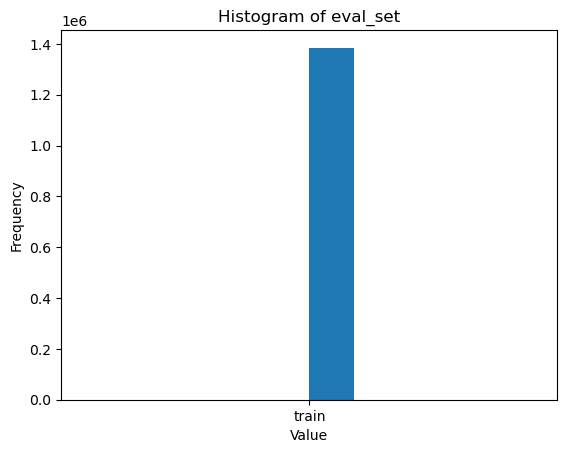

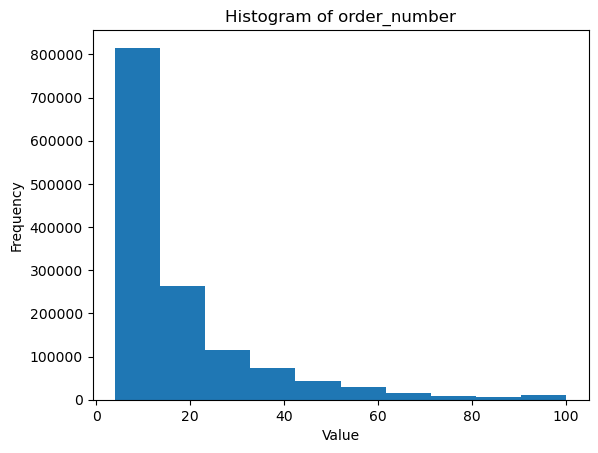

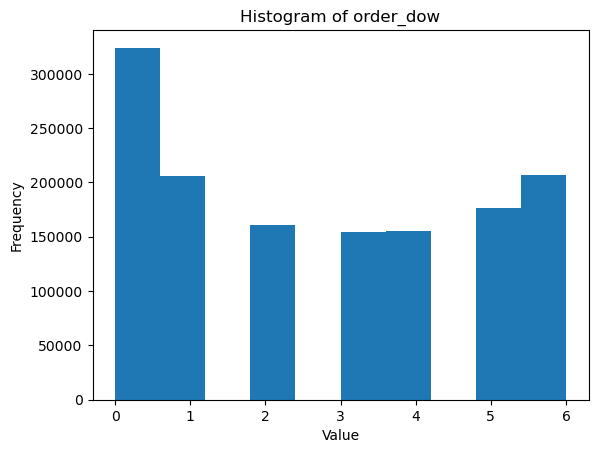

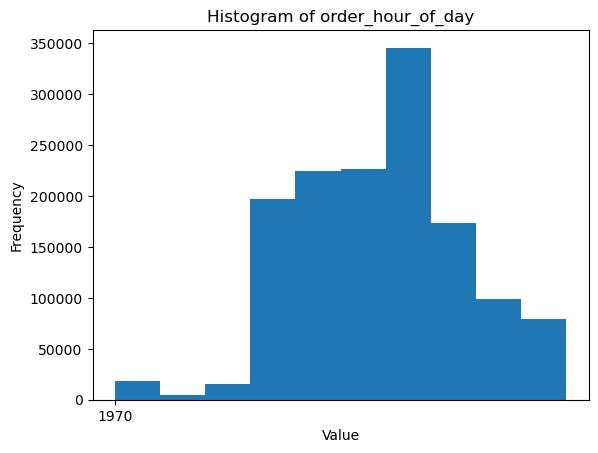

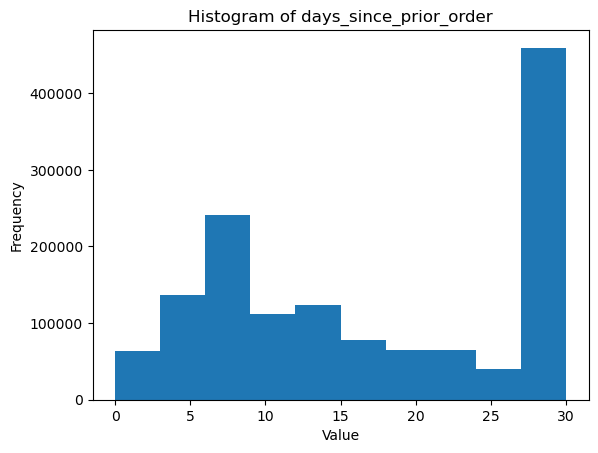

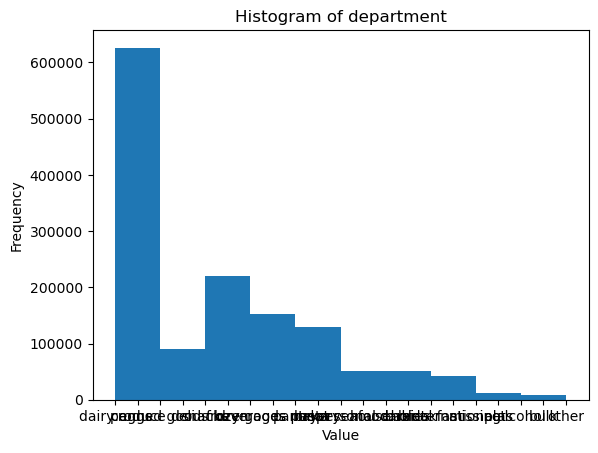

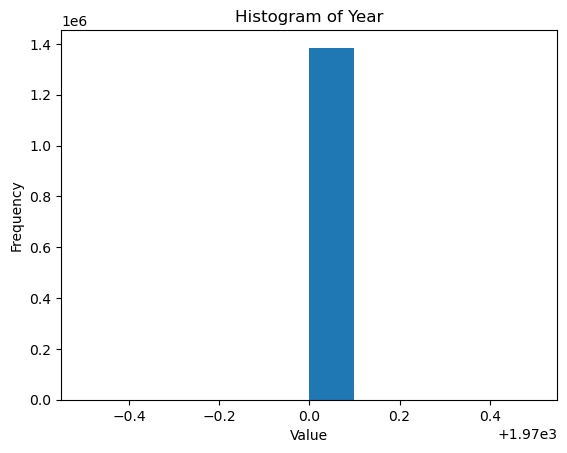

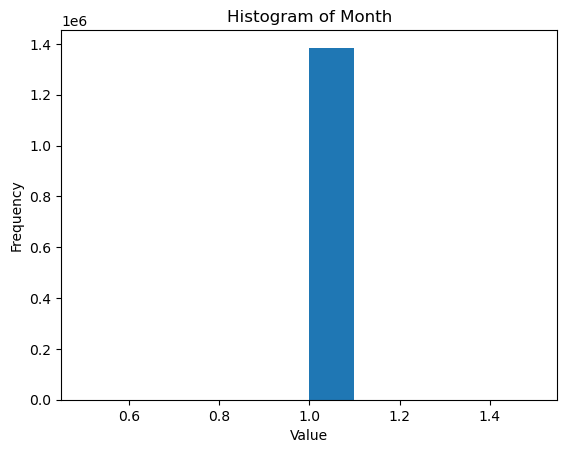

In [43]:
import matplotlib.pyplot as plt

# Iterate over each column in the dataset
for column in final_df.columns:
    # Plot histogram for each column
    plt.hist(final_df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

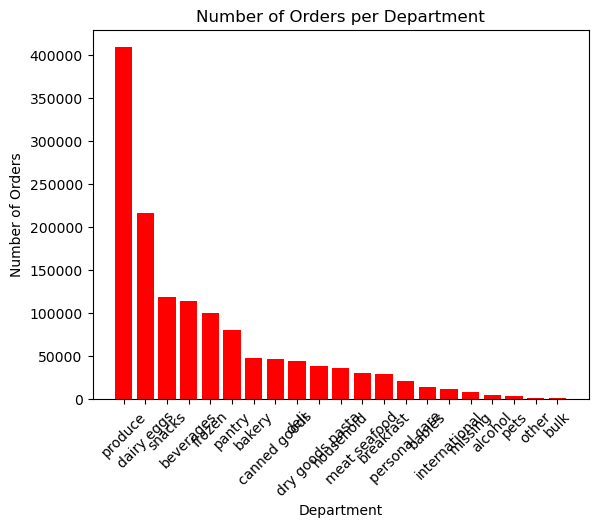

In [44]:
department_counts = final_df['department'].value_counts()
plt.bar(department_counts.index, department_counts.values, color='red')
plt.title('Number of Orders per Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

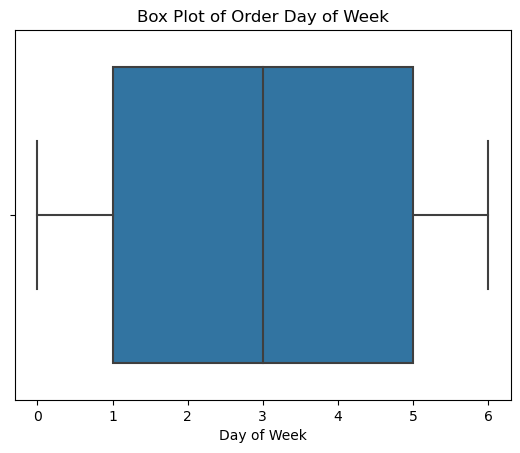

In [45]:
import seaborn as sns
sns.boxplot(x=final_df['order_dow'])
plt.title('Box Plot of Order Day of Week')
plt.xlabel('Day of Week')
plt.show()

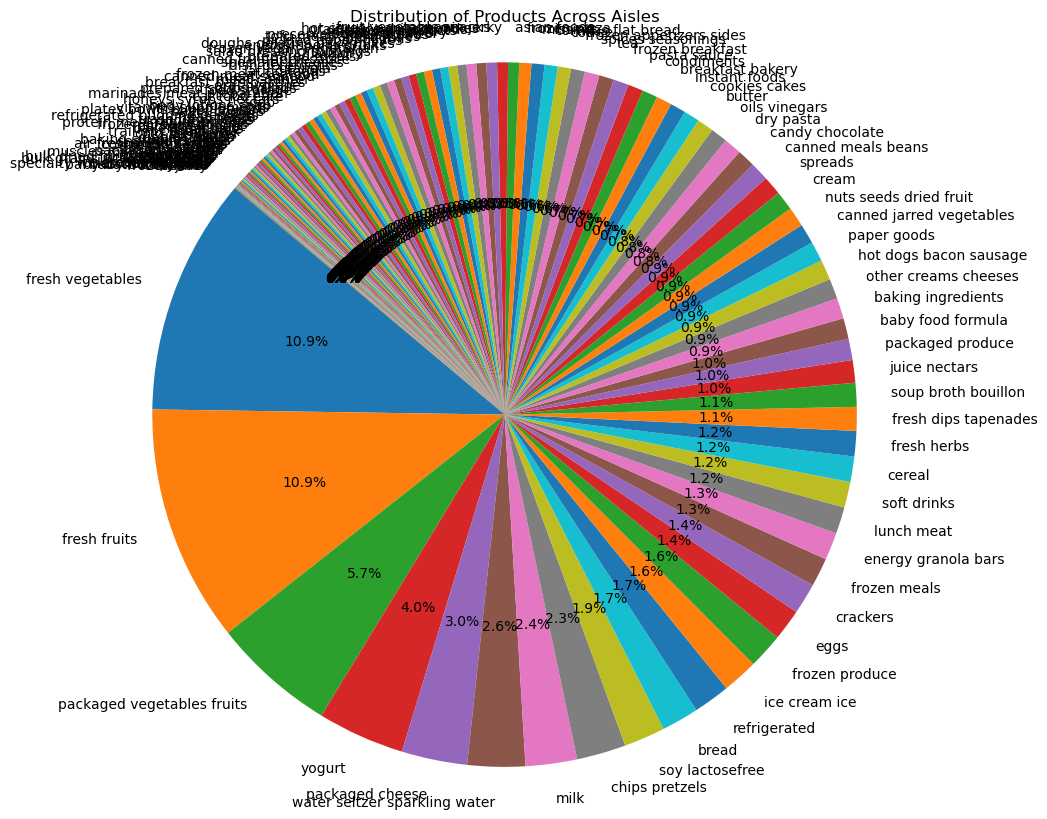

In [46]:
# Grouping by 'aisle' and counting the number of products in each aisle
aisle_counts = final_df['aisle'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(10, 10))
plt.pie(aisle_counts, labels=aisle_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products Across Aisles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Correlation analysis

In [47]:
# Correlation matrix
correlation_matrix = final_df[numerical_columns].corr()

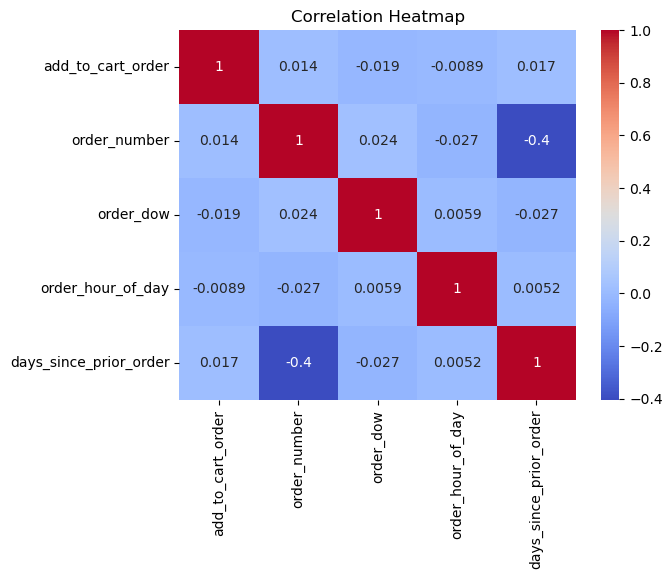

In [48]:
# Heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

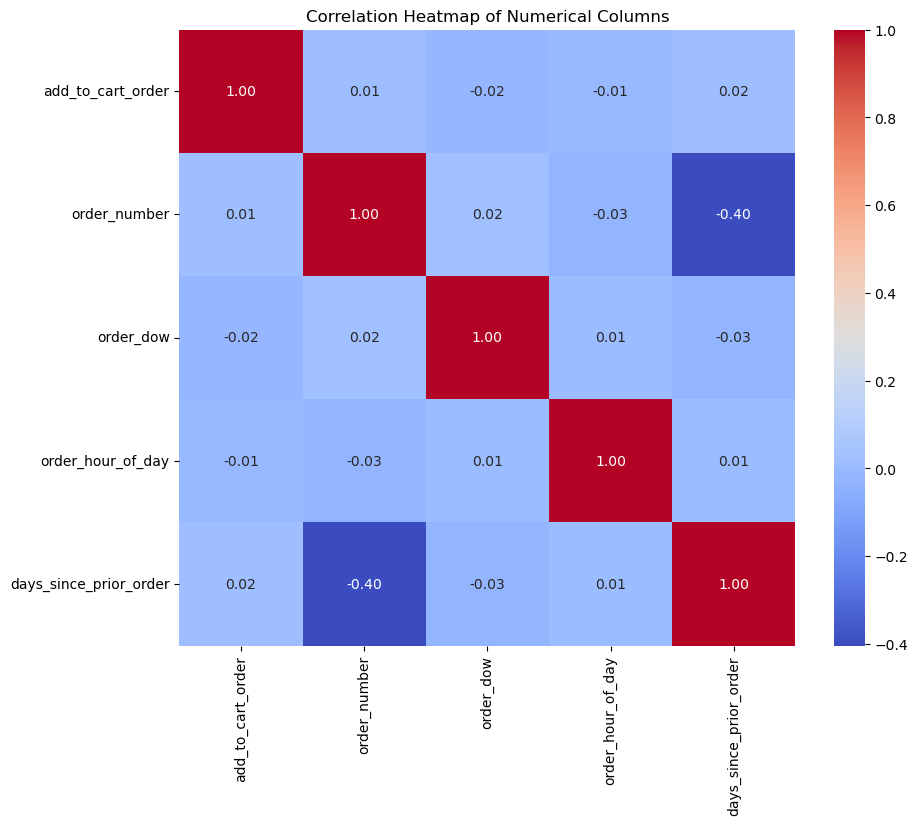

In [49]:
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_columns = ['add_to_cart_order', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

# Compute the correlation matrix
correlation_matrix = final_df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [50]:
NO_OF_PRODUCTS = 100
product_counts = final_df.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:NO_OF_PRODUCTS].reset_index(drop = True)
product_counts.head(10)

product_id  frequency
0       24852      18726
1       13176      15480
2       21137      10894
3       21903       9784
4       47626       8135
5       47766       7409
6       47209       7293
7       16797       6494
8       26209       6033
9       27966       5546

In [51]:
freq_products = list(product_counts.product_id)
freq_products[1:10]

[13176, 21137, 21903, 47626, 47766, 47209, 16797, 26209, 27966]

In [52]:
order_products = final_df[final_df.product_id.isin(freq_products)]
order_products.shape

(314227, 17)

In [53]:
# basket = order_products.groupby(['order_id', 'product_name'])['reordered'].count().unstack().reset_index().fillna(0).set_index('order_id')
# basket.head()

or

In [54]:
basket = order_products.pivot_table(columns='product_name', values='reordered',index='order_id' ).reset_index().fillna(0).set_index('order_id')

In [55]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket = basket.applymap(encode_units)
basket.head()

product_name  100% Whole Wheat Bread  2% Reduced Fat Milk  \
order_id                                                    
1                                  0                    0   
36                                 0                    0   
38                                 0                    0   
96                                 0                    0   
98                                 0                    0   

product_name  Apple Honeycrisp Organic  Asparagus  Bag of Organic Bananas  \
order_id                                                                    
1                                    0          0                       0   
36                                   0          1                       0   
38                                   0          0                       0   
96                                   0          0                       0   
98                                   0          0                       1   

product_name  Banana  Blueberries  Boneless Skinless Chicken Breasts  \
order_id                                                               
1                  0            0                                  0   
36                 0            0                                  0   
38                 0            0                                  0   
96                 0            0                                  0   
98                 0            0                                  0   

product_name  Broccoli Crown  Bunched Cilantro  ...  Sparkling Lemon Water  \
order_id                                        ...                          
1                          0                 0  ...                      0   
36                         0                 0  ...                      0   
38                         0                 0  ...                      0   
96                         0                 0  ...                      0   
98                         0                 0  ...                      0   

product_name  Sparkling Natural Mineral Water  Sparkling Water Grapefruit  \
order_id                                                                    
1                                           0                           0   
36                                          0                           0   
38                                          0                           0   
96                                          0                           0   
98                                          0                           0   

product_name  Spring Water  Strawberries  Uncured Genoa Salami  \
order_id                                                         
1                        0             0                     0   
36                       1             0                     0   
38                       0             0                     0   
96                       0             0                     0   
98                       0             0                     1   

product_name  Unsalted Butter  Unsweetened Almondmilk  \
order_id                                                
1                           0                       0   
36                          0                       0   
38                          0                       0   
96                          0                       0   
98                          0                       0   

product_name  Unsweetened Original Almond Breeze Almond Milk  Yellow Onions  
order_id                                                                     
1                                                          0              0  
36                                                         0              0  
38                                                         0              0  
96                                                         0              0  
98                                                         0              0  

[5 rows x 100 columns]

# Select model  :  Apriori algorithm

In [56]:
! pip install apriori

# Training Model

In [57]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [58]:
shortbasket = basket[:100000]

In [59]:
print(len(shortbasket))

93850


In [60]:
print(shortbasket.info())

<class 'pandas.core.frame.DataFrame'>
Index: 93850 entries, 1 to 3421070
Data columns (total 100 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   100% Whole Wheat Bread                          93850 non-null  int64
 1   2% Reduced Fat Milk                             93850 non-null  int64
 2   Apple Honeycrisp Organic                        93850 non-null  int64
 3   Asparagus                                       93850 non-null  int64
 4   Bag of Organic Bananas                          93850 non-null  int64
 5   Banana                                          93850 non-null  int64
 6   Blueberries                                     93850 non-null  int64
 7   Boneless Skinless Chicken Breasts               93850 non-null  int64
 8   Broccoli Crown                                  93850 non-null  int64
 9   Bunched Cilantro                                93850 non-null 

In [61]:
print(shortbasket.describe())

product_name  100% Whole Wheat Bread  2% Reduced Fat Milk  \
count                   93850.000000         93850.000000   
mean                        0.018668             0.013298   
std                         0.135351             0.114547   
min                         0.000000             0.000000   
25%                         0.000000             0.000000   
50%                         0.000000             0.000000   
75%                         0.000000             0.000000   
max                         1.000000             1.000000   

product_name  Apple Honeycrisp Organic     Asparagus  Bag of Organic Bananas  \
count                     93850.000000  93850.000000            93850.000000   
mean                          0.017304      0.026180                0.142376   
std                           0.130403      0.159671                0.349437   
min                           0.000000      0.000000                0.000000   
25%                           0.000000      0.0000

In [62]:
print(shortbasket.head(20))

product_name  100% Whole Wheat Bread  2% Reduced Fat Milk  \
order_id                                                    
1                                  0                    0   
36                                 0                    0   
38                                 0                    0   
96                                 0                    0   
98                                 0                    0   
112                                0                    0   
170                                1                    0   
226                                0                    0   
349                                0                    0   
393                                0                    0   
456                                0                    0   
473                                0                    0   
631                                0                    0   
762                                0                    0   
844                     

In [63]:
# Apply Apriori algorithm
frequent_items = apriori(shortbasket, min_support=0.01, use_colnames=True)
frequent_items.head()

C:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                    itemsets
0  0.018668    (100% Whole Wheat Bread)
1  0.013298       (2% Reduced Fat Milk)
2  0.017304  (Apple Honeycrisp Organic)
3  0.026180                 (Asparagus)
4  0.142376    (Bag of Organic Bananas)

# Generating Association Rules

In [64]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

antecedents               consequents  antecedent support  \
19                   (Limes)             (Large Lemon)            0.045115   
18             (Large Lemon)                   (Limes)            0.063111   
30    (Organic Strawberries)     (Organic Raspberries)            0.091668   
31     (Organic Raspberries)    (Organic Strawberries)            0.045594   
21         (Organic Avocado)             (Large Lemon)            0.066340   
20             (Large Lemon)         (Organic Avocado)            0.063111   
3     (Organic Hass Avocado)  (Bag of Organic Bananas)            0.064379   
2   (Bag of Organic Bananas)    (Organic Hass Avocado)            0.142376   
4   (Bag of Organic Bananas)     (Organic Raspberries)            0.142376   
5      (Organic Raspberries)  (Bag of Organic Bananas)            0.045594   
28    (Organic Hass Avocado)    (Organic Strawberries)            0.064379   
29    (Organic Strawberries)    (Organic Hass Avocado)            0.091668   
23         (Organic Avocado)    (Organic Baby Spinach)            0.066340   
22    (Organic Baby Spinach)         (Organic Avocado)            0.085828   
6   (Bag of Organic Bananas)    (Organic Strawberries)            0.142376   
7     (Organic Strawberries)  (Bag of Organic Bananas)            0.091668   
25    (Organic Hass Avocado)    (Organic Baby Spinach)            0.064379   
24    (Organic Baby Spinach)    (Organic Hass Avocado)            0.085828   
16            (Strawberries)                  (Banana)            0.050996   
17                  (Banana)            (Strawberries)            0.176420   
11                  (Banana)         (Organic Avocado)            0.176420   
10         (Organic Avocado)                  (Banana)            0.066340   
27    (Organic Strawberries)    (Organic Baby Spinach)            0.091668   
26    (Organic Baby Spinach)    (Organic Strawberries)            0.085828   
1     (Organic Baby Spinach)  (Bag of Organic Bananas)            0.085828   
0   (Bag of Organic Bananas)    (Organic Baby Spinach)            0.142376   
8              (Large Lemon)                  (Banana)            0.063111   
9                   (Banana)             (Large Lemon)            0.176420   
12    (Organic Baby Spinach)                  (Banana)            0.085828   
13                  (Banana)    (Organic Baby Spinach)            0.176420   
15                  (Banana)    (Organic Strawberries)            0.176420   
14    (Organic Strawberries)                  (Banana)            0.091668   

    consequent support   support  confidence      lift  leverage  conviction  \
19            0.063111  0.010325    0.228862  3.626315  0.007478    1.214942   
18            0.045115  0.010325    0.163600  3.626315  0.007478    1.141661   
30            0.045594  0.013074    0.142625  3.128143  0.008895    1.113172   
31            0.091668  0.013074    0.286749  3.128143  0.008895    1.273511   
21            0.063111  0.010293    0.155156  2.458445  0.006106    1.108948   
20            0.066340  0.010293    0.163093  2.458445  0.006106    1.115608   
3             0.142376  0.021449    0.333168  2.340054  0.012283    1.286117   
2             0.064379  0.021449    0.150651  2.340054  0.012283    1.101574   
4             0.045594  0.014811    0.104026  2.281578  0.008319    1.065217   
5             0.142376  0.014811    0.324842  2.281578  0.008319    1.270257   
28            0.091668  0.012637    0.196293  2.141353  0.006736    1.130178   
29            0.064379  0.012637    0.137859  2.141353  0.006736    1.085229   
23            0.085828  0.011316    0.170575  1.987395  0.005622    1.102175   
22            0.066340  0.011316    0.131844  1.987395  0.005622    1.075451   
6             0.091668  0.025456    0.178791  1.950424  0.012404    1.106091   
7             0.142376  0.025456    0.277694  1.950424  0.012404    1.187341   
25            0.085828  0.010229    0.158888  1.851225  0.004704    1.086860   
24

# Making Recommandations & Validate model

In [65]:
shortbasket['Organic Strawberries'].sum()

8603

In [66]:
shortbasket['Banana'].sum()

16557

In [67]:
# Filtering rules based on condition
rules[(rules['lift'] <= 3) & 
     (rules['confidence'] <= 0.3)]

antecedents               consequents  antecedent support  \
0   (Bag of Organic Bananas)    (Organic Baby Spinach)            0.142376   
1     (Organic Baby Spinach)  (Bag of Organic Bananas)            0.085828   
2   (Bag of Organic Bananas)    (Organic Hass Avocado)            0.142376   
4   (Bag of Organic Bananas)     (Organic Raspberries)            0.142376   
6   (Bag of Organic Bananas)    (Organic Strawberries)            0.142376   
7     (Organic Strawberries)  (Bag of Organic Bananas)            0.091668   
8              (Large Lemon)                  (Banana)            0.063111   
9                   (Banana)             (Large Lemon)            0.176420   
10         (Organic Avocado)                  (Banana)            0.066340   
11                  (Banana)         (Organic Avocado)            0.176420   
12    (Organic Baby Spinach)                  (Banana)            0.085828   
13                  (Banana)    (Organic Baby Spinach)            0.176420   
14    (Organic Strawberries)                  (Banana)            0.091668   
15                  (Banana)    (Organic Strawberries)            0.176420   
16            (Strawberries)                  (Banana)            0.050996   
17                  (Banana)            (Strawberries)            0.176420   
20             (Large Lemon)         (Organic Avocado)            0.063111   
21         (Organic Avocado)             (Large Lemon)            0.066340   
22    (Organic Baby Spinach)         (Organic Avocado)            0.085828   
23         (Organic Avocado)    (Organic Baby Spinach)            0.066340   
24    (Organic Baby Spinach)    (Organic Hass Avocado)            0.085828   
25    (Organic Hass Avocado)    (Organic Baby Spinach)            0.064379   
26    (Organic Baby Spinach)    (Organic Strawberries)            0.085828   
27    (Organic Strawberries)    (Organic Baby Spinach)            0.091668   
28    (Organic Hass Avocado)    (Organic Strawberries)            0.064379   
29    (Organic Strawberries)    (Organic Hass Avocado)            0.091668   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.085828  0.018498    0.129921  1.513725  0.006278    1.050676   
1             0.142376  0.018498    0.215518  1.513725  0.006278    1.093236   
2             0.064379  0.021449    0.150651  2.340054  0.012283    1.101574   
4             0.045594  0.014811    0.104026  2.281578  0.008319    1.065217   
6             0.091668  0.025456    0.178791  1.950424  0.012404    1.106091   
7             0.142376  0.025456    0.277694  1.950424  0.012404    1.187341   
8             0.176420  0.016537    0.262029  1.485260  0.005403    1.116007   
9             0.063111  0.016537    0.093737  1.485260  0.005403    1.033793   
10            0.176420  0.019318    0.291198  1.650598  0.007614    1.161933   
11            0.066340  0.019318    0.109501  1.650598  0.007614    1.048468   
12            0.176420  0.016665    0.194165  1.100586  0.001523    1.022021   
13            0.085828  0.016665    0.094462  1.100586  0.001523    1.009534   
14            0.176420  0.017315    0.188888  1.070671  0.001143    1.015371   
15            0.091668  0.017315    0.098146  1.070671  0.001143    1.007183   
16            0.176420  0.015248    0.298997  1.694804  0.006251    1.174860   
17            0.050996  0.015248    0.086429  1.694804  0.006251    1.038785   
20            0.066340  0.010293    0.163093  2.458445  0.006106    1.115608   
21            0.063111  0.010293    0.155156  2.458445  0.006106    1.108948   
22            0.066340  0.011316    0.131844  1.987395  0.005622    1.075451   
23            0.085828  0.011316    0.170575  1.987395  0.005622    1.102175   
24            0.064379  0.010229    0.119181  1.851225  0.004704    1.062216   
25            0.085828  0.010229    0.158888  1.851225  0.004704    1.086860   
26            0.091668  0.012765    0.148727  1.622466  0.004897    1.

# Interpretation

In [68]:
# Display shortbasket
print(shortbasket.head())

# Display association rules
print(rules.head())

product_name  100% Whole Wheat Bread  2% Reduced Fat Milk  \
order_id                                                    
1                                  0                    0   
36                                 0                    0   
38                                 0                    0   
96                                 0                    0   
98                                 0                    0   

product_name  Apple Honeycrisp Organic  Asparagus  Bag of Organic Bananas  \
order_id                                                                    
1                                    0          0                       0   
36                                   0          1                       0   
38                                   0          0                       0   
96                                   0          0                       0   
98                                   0          0                       1   

product_name  Banana  Blueberrie

# Hyperparameter tunning 

In [69]:
from mlxtend.frequent_patterns import apriori

In [ ]:
Hyperparameter tuning involves selecting the best parameters for a machine learning algorithm to optimize its performance.
However, the Apriori algorithm does not have traditional hyperparameters like other machine learning algorithms. 
Instead, it has a minimum support threshold, which determines the minimum frequency of itemsets to be considered frequent.
support_thresholds = [0.01, 0.02, 0.03, 0.04, 0.05] used these thresholds for minimum_support

# Deployment  of MARKET BASKET ANALYSIS

In [ ]:
Market Basket Analysis (MBA) using the Apriori algorithm involves
implementing the model and integrating it into a production environment
where it can be used to derive insights and make business decisions in real-time. 

In [ ]:
1.PREPROCESSING and DATA PREPARATION :

Ensure that the dataset is preprocessed and prepared appropriately for MBA. 
This may include handling missing values, encoding categorical variables, 
and transforming the data into the required format for Apriori.

In [ ]:
2.TRAINING THE APRIORI MODEL :

Use the preprocessed dataset to train the Apriori algorithm. 
This involves identifying frequent itemsets and generating association rules
based on support, confidence, and lift thresholds.

In [ ]:
3.MODEL EVALUATION and VALIDATION :

Evaluate the performance of the Apriori model using validation techniques 
such as cross-validation or holdout validation. 
Assess the quality of the association rules generated and refine the model parameters if necessary.

In [ ]:
4.INTEGRATION WITH BUSINESS SYSTEMS:

Integrate the trained Apriori model into the existing business systems or analytics pipeline. 
This may involve deploying the model on a cloud-based platform, such as AWS or Azure, 
or embedding it within an application or software tool used by business stakeholders.

In [ ]:
5.REAL-TIME ANALYSIS and INSIGHTS:

Enable real-time analysis of transactional data using the deployed Apriori model.
This allows business stakeholders to derive insights and make data-driven decisions on-the-fly.

In [ ]:
6.VISUALIZATION  and REPORTING:

Develop interactive dashboards or reports to visualize the results of the MBA. 
Provide stakeholders with intuitive interfaces to explore association rules, frequent itemsets, 
and other relevant metrics.

In [ ]:
7.MONITORING  and MAINTENANCE:

Continuously monitor the performance of the deployed Apriori model and update it as new data becomes available. 
Monitor key metrics such as support, confidence, and lift to ensure that the model remains effective over time.

In [ ]:
8.SCALABILITY  and EFFICIENCY:

Design the deployment architecture to ensure scalability and efficiency, 
especially when dealing with large-scale transactional data. 
Use distributed computing frameworks or optimization techniques to handle increased data volume and processing demands.

In [ ]:
9.USER TRAINING and SUPPORT:

Provide training and support to users who interact with the deployed MBA solution. 
Educate them on how to interpret the results, understand the implications of association rules, 
and leverage the insights for decision-making.

In [ ]:
10.ITERATION and FEEDBACK :

Gather feedback from users and stakeholders on the effectiveness and usability of the deployed MBA solution. 
Use this feedback to iterate on the model, refine business rules, and improve the overall deployment process.